# Digit recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

%matplotlib inline

## Load Data

In [2]:
data = pd.read_csv('TrainLabels.csv')

In [3]:
data

,imageId,label
0,0.png,1
1,1.png,0
2,2.png,1
3,3.png,4
4,4.png,0
...,...,...
41995,41995.png,0
41996,41996.png,1
41997,41997.png,7
41998,41998.png,6


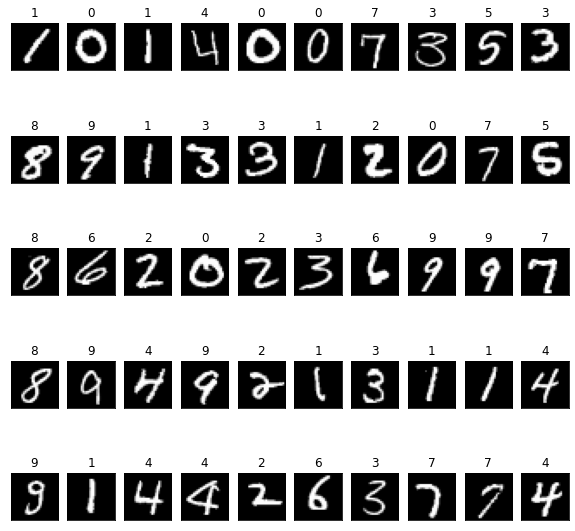

In [4]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    fig = plt.imshow(cv.imread('trainImages/'+data.iloc[i,0]))
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.title(data.iloc[i,1])

### Load Images

In [5]:
X = np.ndarray((data.shape[0],28*28))
for i in range(data.shape[0]):
    img = cv.imread('trainImages/'+data.iloc[i,0])
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    X[i] = img.reshape((28*28))

In [6]:
X.shape

(42000, 784)

### Load Labels

In [7]:
Y = data['label']

In [8]:
Y.shape

(42000,)

## Split the data

In [9]:
%%time
from sklearn.model_selection import train_test_split
x_train,x_test , y_train , y_test = train_test_split(X,Y)

CPU times: user 388 ms, sys: 469 ms, total: 857 ms
Wall time: 3.27 s


In [10]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31500, 784) (10500, 784) (31500,) (10500,)


## Train Model Using XGB Algorithm

In [11]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators = 15,max_depth=20)

In [12]:
%%time
xgb_classifier.fit(x_train,y_train)

/home/qeubd-bsjso/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 10min 42s, sys: 988 ms, total: 10min 42s
Wall time: 5min 28s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=15, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Testing 

In [13]:
y_pred = xgb_classifier.predict(x_test)

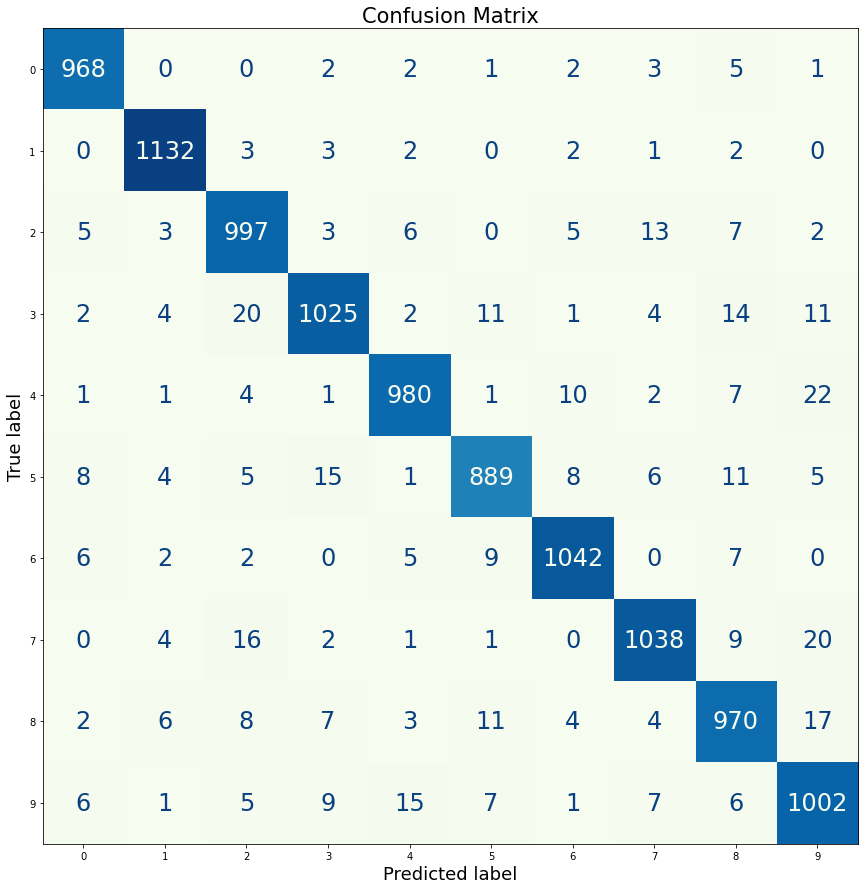

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig = plt.figure(figsize=(15,15))
ax = fig.gca()
sns.set(font_scale=2.0)
ax.set_xlabel('Predicted labels', fontdict={'size':'18'});
ax.set_ylabel('True labels', fontdict={'size':'18'});
#ax.tick_params(axis='x', labelsize= 20)
#ax.tick_params(axis='y', labelsize= 20)
title_font = {'size':'21'}
ax.set_title('Confusion Matrix', fontdict=title_font);
disp.plot(cmap = 'GnBu',ax=ax,colorbar=False)

In [15]:
Score = pd.DataFrame({'Digit' : [0,1,2,3,4,5,6,7,8,9]})

## Precision  = $ \dfrac{TP}{TP+FP}$

In [16]:
from sklearn.metrics import precision_score
Score['Precision'] = precision_score(y_test,y_pred,average=None)
Score[['Digit','Precision']]

,Digit,Precision
0,0,0.969940
1,1,0.978392
2,2,0.940566
3,3,0.960637
4,4,0.963618
5,5,0.955914
6,6,0.969302
7,7,0.962894
8,8,0.934489
9,9,0.927778


## Recall = $\dfrac{TP}{TP+FN}$

In [17]:
from sklearn.metrics import recall_score
Score['Recall'] = recall_score(y_test,y_pred,average=None)
Score[['Digit','Recall']]

,Digit,Recall
0,0,0.983740
1,1,0.988646
2,2,0.957733
3,3,0.936929
4,4,0.952381
5,5,0.933824
6,6,0.971109
7,7,0.951421
8,8,0.939922
9,9,0.946176


## F1 Score = $\dfrac{2}{\dfrac{1}{Recall} + \dfrac{1}{Precision}}$

In [18]:
from sklearn.metrics import f1_score
Score['F1 Score'] = f1_score(y_test,y_pred,average=None)
Score[['Digit','F1 Score']]

,Digit,F1 Score
0,0,0.976791
1,1,0.983493
2,2,0.949072
3,3,0.948635
4,4,0.957967
5,5,0.944740
6,6,0.970205
7,7,0.957123
8,8,0.937198
9,9,0.936886


In [19]:
Score

,Digit,Precision,Recall,F1 Score
0,0,0.969940,0.983740,0.976791
1,1,0.978392,0.988646,0.983493
2,2,0.940566,0.957733,0.949072
3,3,0.960637,0.936929,0.948635
4,4,0.963618,0.952381,0.957967
5,5,0.955914,0.933824,0.944740
6,6,0.969302,0.971109,0.970205
7,7,0.962894,0.951421,0.957123
8,8,0.934489,0.939922,0.937198
9,9,0.927778,0.946176,0.936886


## Accuracy

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9564761904761905

In [21]:
#Train on Full Data
xgb_classifier.fit(X,Y)

/home/qeubd-bsjso/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=15, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Predictions

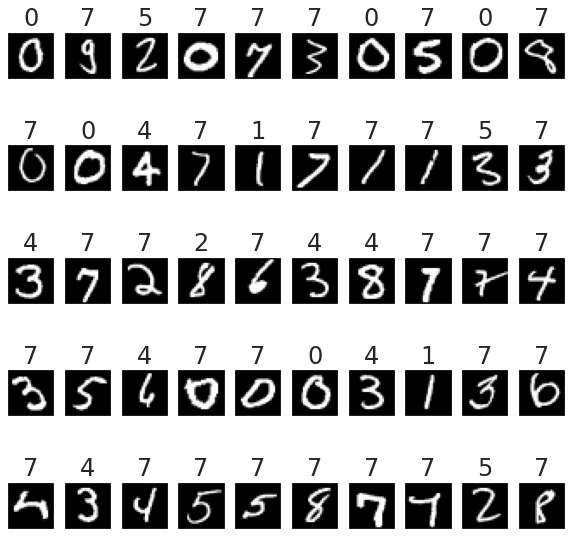

In [22]:
images = np.ndarray((50,28*28))
y = np.ndarray(50)
for i in range(50):
    img = cv.imread('testImages/'+str(i+100)+'.png')
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = img.reshape((28*28))
    images[i] = img/255

y = xgb_classifier.predict(images)
    
plt.figure(figsize=(10,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    fig = plt.imshow(images[i].reshape((28,28)), cmap = 'gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.title(y[i])

In [30]:
%%time
for i in range(28000):
    img = cv.imread('testImages/'+str(i)+'.png')
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    mat = img.reshape((28*28))
    mat = mat/255
    val = xgb_classifier.predict(np.array([mat]))
    cv.imwrite(str(val[0])+'/'+str(i)+'.png',img)

CPU times: user 1min 57s, sys: 6.55 s, total: 2min 4s
Wall time: 1min 46s
